In [1]:
import numpy as np, matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.special import comb as C
acc_score = od()

In [2]:
def get_entropy_from_culling_factor(c):
    S = od({1: 0})
    for E in range(0, -len(c) + 2, -1):
        S[E] = S[E + 1] + np.log(1 - c[E + 1])
    for E in range(0, -len(c) + 2, -1):
        S[E] += np.log(c[E])
    return S
def get_DOS_from_entropy(S):
    g = od()
    Z = 0
    for E, s in S.items():
        t = np.exp(s)
        if t > 0 and E <= -200:
            g[E] = t
            Z += t
    for E in g:
        g[E] /= (Z * 2)
    return g

def get_DOS(N):
    DOS = od()
    Z = 0
    for k in range(200, 401, 2):
        DOS[-k] = C(N, k)
        Z += C(N, k)
    for k in range(200, 401, 2):
        DOS[-k] /= (Z * 2)
    return DOS

In [7]:
for nSteps in [1, 2, 3, 5, 10, 30, 50]:
    name = "./datasets/1DIsing_N400_R1048576_nSteps{}_run1X.txt".format(nSteps)
    culling_factor = od()
    culling_factor[1] = 0
    culling_factor[0] = 0
    N = int(name.split("_N")[1].split("_R")[0])
    R = int(name.split("_R")[1].split("_nSteps")[0])
    print(N, R, nSteps)
    with open(name) as f:
        for line in f:
            E, c = map(float, line.split())
            culling_factor[E] = c
    culling_factor[-400] = 1.0
    
    DOS = get_DOS(N)
    
    S = get_entropy_from_culling_factor(culling_factor)
    g = get_DOS_from_entropy(S)
    
    #plt.figure(figsize=(16, 9))
    #plt.plot([E for E in g], [np.log(g[E]) for E in g], 'o', label="Machta nSteps={}".format(nSteps))
    #plt.plot([E for E in DOS], [np.log(DOS[E]) for E in DOS], label=" normed C(N-1, k)".format(N))

    #plt.yscale("log DOS")
    #plt.ylabel("log")
    #plt.legend()
    #plt.grid()
    #plt.show()
    acc = sum([np.log(DOS[E]) - np.log(g[E]) for E in g])
    acc_score[nSteps] = acc


400 1048576 1
400 1048576 2
400 1048576 3
400 1048576 5
400 1048576 10
400 1048576 30
400 1048576 50


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


No handles with labels found to put in legend.


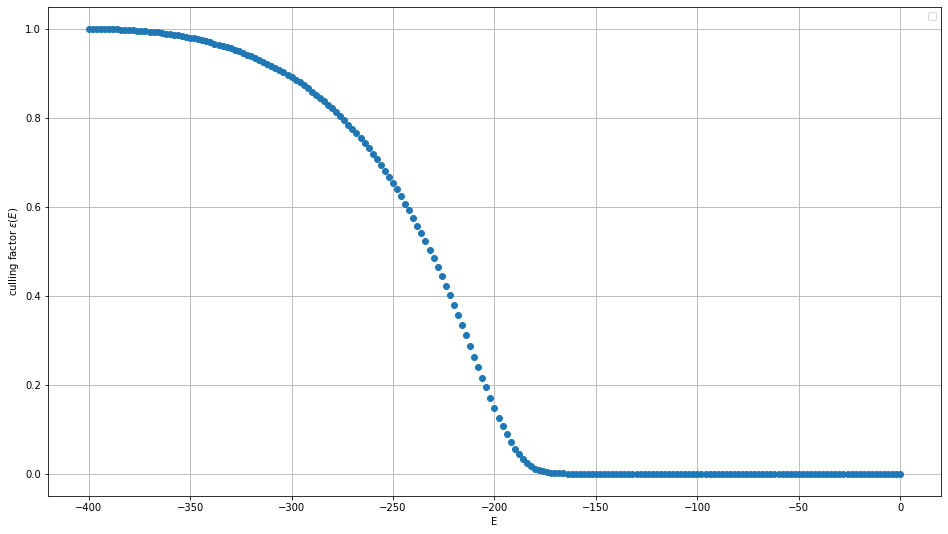

In [19]:
plt.figure(figsize=(16, 9))
threshold = -200
plt.plot([E for E in culling_factor if E % 2 == 0], [c for E, c in culling_factor.items() if E % 2 == 0], 'o')

plt.ylabel("culling factor $\epsilon(E)$")
plt.xlabel("E")
#plt.yscale("log")
plt.legend()
plt.grid()
plt.savefig("2.png")

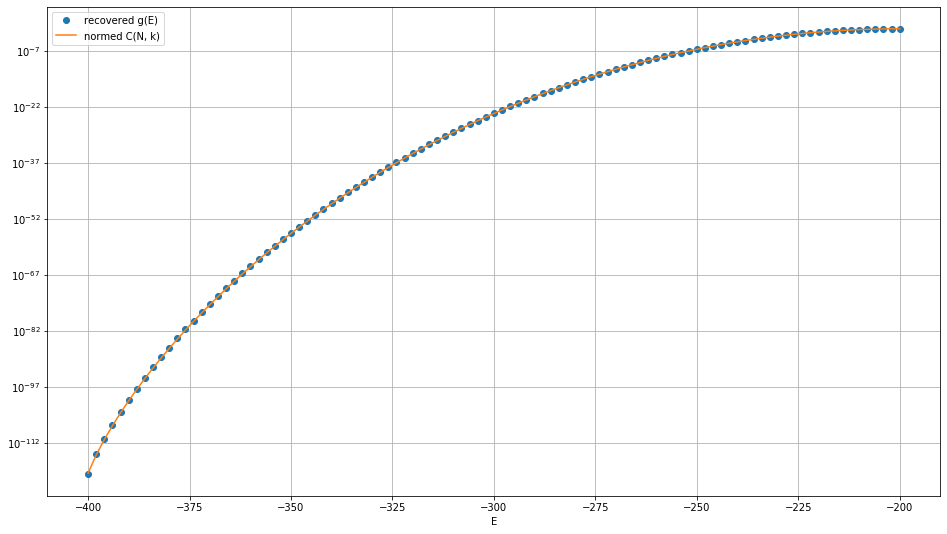

In [25]:
plt.figure(figsize=(16, 9))
threshold = -200
plt.plot([E for E in g if E <= threshold], [g[E] for E in g if E <= threshold], 'o', label="recovered g(E)")
plt.plot([E for E in DOS if E <= threshold], [DOS[E] for E in DOS if E <= threshold], label="normed C(N, k)".format(N))

#plt.ylabel("log DOS")
plt.yscale("log")
plt.xlabel("E")
plt.legend()
plt.grid()
plt.savefig("3.png")

In [ ]:
plt.figure(figsize=(16, 9))
threshold = -200
plt.plot([E for E in g if E <= threshold], [np.log(g[E]) for E in g if E <= threshold], 'o', label="Machta nSteps={}".format(nSteps))
plt.plot([E for E in DOS if E <= threshold], [np.log(DOS[E]) for E in DOS if E <= threshold], label=" normed C(N, k)".format(N))

#plt.ylabel("log DOS")
#plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

In [23]:
acc_score

OrderedDict([(1, -7.126068581816597),
             (2, -12.471599392790509),
             (3, -13.990611275573745),
             (5, -14.844003655581183),
             (10, -16.73313092459494),
             (30, -14.453273560563915),
             (50, -16.459788643820605)])

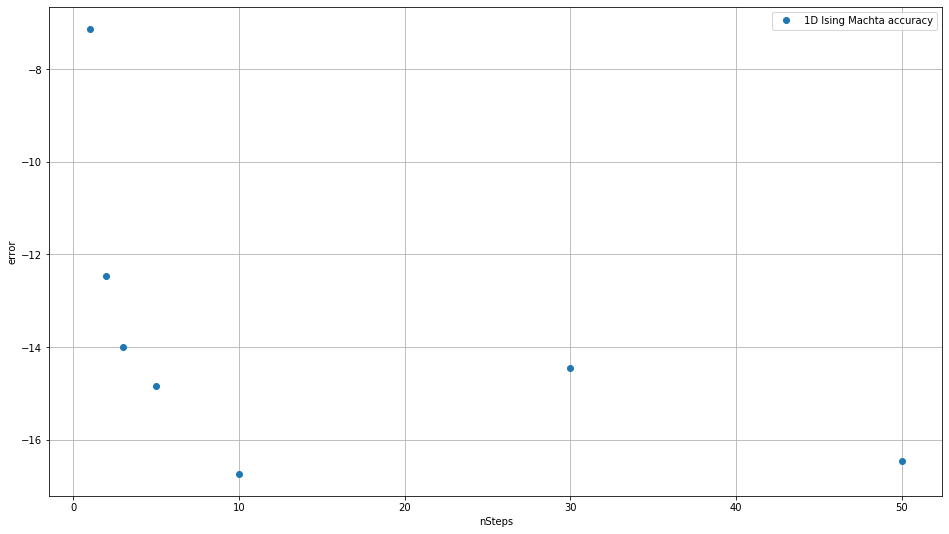

In [24]:
plt.figure(figsize=(16, 9))
plt.plot([E for E in acc_score], [acc_score[E] for E in acc_score], 'o', label="1D Ising Machta accuracy")

plt.legend()
plt.ylabel("error")
plt.xlabel("nSteps")
plt.grid()
plt.show()

R movement

In [3]:
acc_score = od()
for nSteps in [10, 30, 50]:
    for seed in [1, 2, 3]:
        for R in [4096, 8192, 16384, 32768, 65536, 131072, 262144, 307200, 409600, 512000, 524288, 716800, 819200, 921600,
                  1048576, 2097152, 2097152*2]: 
            try:
                name = "./datasets/1DIsing_N400_R{}_nSteps{}_run{}X.txt".format(R, nSteps, seed)
                culling_factor = od()
                culling_factor[1] = 0
                culling_factor[0] = 0
                N = int(name.split("_N")[1].split("_R")[0])
        #        R = int(name.split("_R")[1].split("_nSteps")[0])
                #print(N, R, nSteps, seed)
                with open(name) as f:
                    for line in f:
                        E, c = map(float, line.split())
                        culling_factor[E] = c
                culling_factor[-400] = 1.0

                DOS = get_DOS(N)

                S = get_entropy_from_culling_factor(culling_factor)
                g = get_DOS_from_entropy(S)

                #plt.figure(figsize=(16, 9))
                #plt.plot([E for E in g], [np.log(g[E]) for E in g], 'o', label="Machta nSteps={}".format(nSteps))
                #plt.plot([E for E in DOS], [np.log(DOS[E]) for E in DOS], label=" normed C(N-1, k)".format(N))

                #plt.yscale("log DOS")
                #plt.ylabel("log")
                #plt.legend()
                #plt.grid()
                #plt.show()
                acc = sum([np.log(DOS[E]) - np.log(g[E]) for E in g])
                acc_score[(R, seed, nSteps)] = acc
            except:
                pass

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


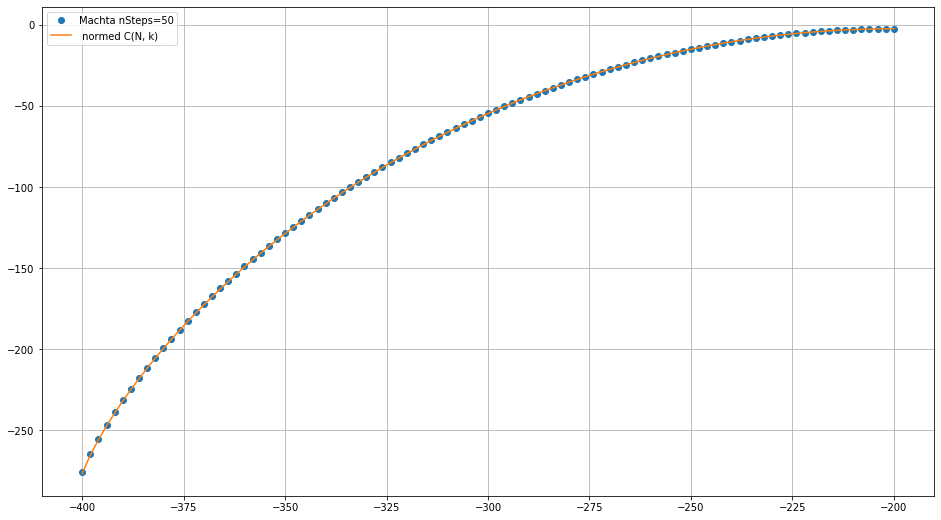

In [4]:
plt.figure(figsize=(16, 9))
threshold = -200
plt.plot([E for E in g if E <= threshold], [np.log(g[E]) for E in g if E <= threshold], 'o', label="Machta nSteps={}".format(nSteps))
plt.plot([E for E in DOS if E <= threshold], [np.log(DOS[E]) for E in DOS if E <= threshold], label=" normed C(N, k)".format(N))

#plt.ylabel("log DOS")
#plt.yscale("log")
plt.legend()
plt.grid()
plt.show()
#acc_score

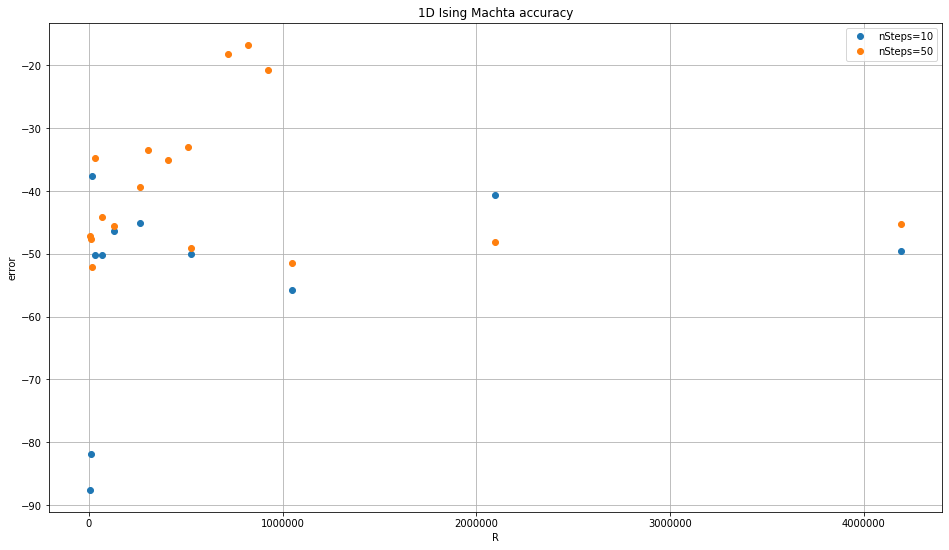

In [5]:
plt.figure(figsize=(16, 9))
for z in [10, 50]:
    plt.plot([R for R, seed, nSteps in acc_score if nSteps == z and seed == 1], [acc_score[(R, seed, nSteps)] for R, seed, nSteps in acc_score
        if nSteps == z and seed == 1], 'o', label="nSteps={}".format(z))

plt.title("1D Ising Machta accuracy")
plt.legend()
plt.ylabel("error")
plt.xlabel("R")
plt.grid()
plt.show()

In [27]:
[x / 256 for x in [4096, 8192, 16384, 32768, 65536, 131072, 262144, 307200, 409600, 512000, 524288, 716800, 819200, 921600,
                  1048576, 2097152, 2097152*2]]

[16.0,
 32.0,
 64.0,
 128.0,
 256.0,
 512.0,
 1024.0,
 1200.0,
 1600.0,
 2000.0,
 2048.0,
 2800.0,
 3200.0,
 3600.0,
 4096.0,
 8192.0,
 16384.0]

In [ ]:
plt.figure(figsize=(16, 9))
for z in [10, 50]:
    plt.plot([R for R, seed, nSteps in acc_score if nSteps == z], [acc_score[(R, seed, nSteps)] for R, seed, nSteps in acc_score
        if nSteps == z], 'o', label="nSteps={}".format(z))

plt.title("1D Ising Machta accuracy")
plt.legend()
plt.ylabel("error")
plt.xlabel("R")
plt.grid()
plt.show()